# Developing a Hybrid Root Finding Algorithm

**Haroon Parvez  -   220475901**

# Introduction

**Abstract**

Finding the root of a function is a fundamental aspect of mathematics and physics. It is essential for solving equations appearing in various areas such as algebra, numerical analysis, and calculus. Using a coded algorithm to find roots can be extremely useful as it is not only highly efficient, but accurate and a versatile tool that performs a task that would usually be time consuming in less than a second. There are many algorithms which make use of known mathematical formulas and techniques to locate the roots of a function. However, these usually come with drawbacks, as certain algorithms struggle with specific types of functions. For example, the Newton\-Raphson method, while highly efficient, may not converge to a root if the derivative is too small, or if the initial guess is not close enough to the root. The idea of a 'hybrid' function certainly is not new, as seen by the report made by the computer science department at Missouri University of Science and Technology \[[1](https://www.mdpi.com/2227-7390/7/11/1118)\], who combined the Bisection and Regula\-Falsi methods into a function. In this report, I will be using three root finding algorithms and leveraging their strengths to create a hybrid root finding algorithm. This algorithm aims to be able to provide the roots of any function you give it.

**Root Finding Algorithms**

The three algorithms I will be using are the Newton\-Raphson method, the Regula\-Falsi method and the Bisection method. My method will be to test each algorithm with different types of functions to see where they fail and excel, and then use this information to create a hybrid function. This report will also show how I tested the hybrid function and improved it along the way, as well as using it to solve a real physics problem.  



# Method

For this report, I will take inspiration from the report made by the Department of Mathematics at Government College University \[[3](https://www.mdpi.com/2075-1680/12/7/684)\], where they proposed that when developing a hybrid algorithm, it is essential to identify their weaknesses and strengths. To do this, I will test each the effectiveness of each algorithm with several different types of functions. I will make extensive use of the Numpy module, which is overall very useful for a variety of things, most useful for performing mathematical operations in Python.

I will test each algorithm in the same way, noting the types of functions each algorithm struggles with.

The same set of functions will be used throughout this report, they are different types of functions, ranging from fairly simple to notoriously difficult to solve. This will be useful to see how each algorithm responds to specific situations. This can then be used as a comparison with the hybrid function. The functions I will use are defined below:

- f1: A polynomial with multiple roots.

- f2: An exponential function.

- f3: A sine function.

- f4: A function with a large slope at the root.

- f5: A discontinuous function.  



In [1]:
import numpy as np  # importing modules
import matplotlib.pyplot as plt

In [2]:
# Polynomial with multiple roots.

def f1(x):
    return x**3 - 6*x**2 + 11*x - 6

# Derivative of f1(x)

def f1p(x):
    return 3*x**2 - 12*x + 11

In [3]:
# Exponential Function

def f2(x):
    return np.exp(x) - 2

# Derivative of f2(x)

def f2p(x):
    return np.exp(x)

In [4]:
# Sin Function

def f3(x):
    return np.sin(x) - 0.5

# Derivative of f3(x)

def f3p(x):
    return np.cos(x)

In [5]:
# Function with a large slope close to the root

def f4(x):
    return 100 * (x - 3)

# Derivative of f4(x)

def f4p(x):
    return 100

In [6]:
# A discontinuous function which may be challenging.


def f5(x):
    return 1 / np.tan(x) - 1  # cot(x) - 1

# Derivative of f5(x)
def f5p(x):
    return -1 / (np.sin(x)**2)

# Testing of Individual Algorithms

**Bisection Method**

The Bisection Method is a simple numerical technique, requiring an interval \(a, b\) in which the function changes sign. This method halves the interval over a certain amount of iterations and converges at the root once the interval becomes sufficiently small. This method is relatively slow compared to the other two methods, but still effiecient. I will start by Defining the function below:  



In [7]:
def Bisection_Method(f, bounds):
    """Performs the bisection algorithm to locate a root of f,
    and returns the root that is found.

    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root
    returns:
    - approximation of the root
    - iterations
    """

    iterations = 0  # For keeping track of iterations

    lower, upper = bounds   # unpacking bounds into upper and lower bounds

    while upper - lower > 1.0e-8:  # Setting a tolerance close to zero

        iterations += 1
        midpoint = (lower + upper) / 2   # calculating the midpoint
        if f(lower) * f(midpoint) < 0:
            lower, upper = (lower, midpoint)
        else:
            lower, upper = (midpoint, upper)

    return (lower + upper) / 2, iterations  # Midpoint of the bounds as an approximation



Now I will call the function and print out what they return for each test function \(I will use this same style throughout this report\):  



In [8]:
root_f1, iterations = Bisection_Method(f1, (-1, 4))
print('The roots of f1 are 1, 2 amd 3. The bisection method gives', root_f1, 'in', iterations,'iterations')

print() # Gap for easier reading

root_f2, iterations = Bisection_Method(f2, (0, 2))
print('The root of f2 is 0.6931... The bisection method gives', root_f2, 'in', iterations,'iterations')

print()

root_f3, iterations = Bisection_Method(f3, (0, 2))
print('The root of f3 is 0.5236. The bisection method gives', root_f3, 'in', iterations,'iterations')

print()

root_f4, iterations = Bisection_Method(f4, (2.9, 3.1))
print('The root of f4 is 3. The bisection method gives', root_f4, 'in', iterations,'iterations')

print()

root_f5, iterations = Bisection_Method(f5, (0.1, np.pi / 2))
print(f"The root of f5 is 0.7854. The bisection method gives {root_f5} in {iterations} iterations.")

The roots of f1 are 1, 2 amd 3. The bisection method gives 0.9999999972060323 in 29 iterations

The root of f2 is 0.6931... The bisection method gives 0.6931471787393093 in 28 iterations

The root of f3 is 0.5236. The bisection method gives 0.5235987789928913 in 28 iterations

The root of f4 is 3. The bisection method gives 3.0999999970197676 in 25 iterations

The root of f5 is 0.7854. The bisection method gives 0.785398161882322 in 28 iterations.


The advantage of the bisection method is that it will always converge, with the drawback being that it is slower and may also not be as accurate depending on the function. As seen for function f4, a function with a large slope around the root, the root that was found is slightly off. This shows that the bisection method struggles to converge accurately for functions which do not 'behave well' so to speak, this method works best for functions with a smooth and simple graph.  



**Regula-Falsi Method**

The Regula-Falsi (otherwise known as the 'False Position' method) method is similar to the bisection method in that uses an interval (a, b), but instead of halving it, it uses linear interpolation. The root is found by calculating the intersection point of a straight line through (a, f(a)) and (b, f(b)) with the x-axis. The algorithm is defined below:

In [9]:
def Regula_Falsi(f, bounds):
    """
    Performs the regula falsi algorithm to locate a root of f,
    and returns the root that is found.

    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root
    returns:
    - approximation of the root
    - iterations
    """
    iterations = 0  # To keep track of iterations

    lower, upper = bounds  # unpacking bounds into upper and lower bounds

    root = (lower + upper) / 2  # calculating the midpoint as an intial approximation

    while abs(f(lower)) > 1.0e-8 and abs(f(upper)) > 1.0e-8:  # checking it is within tolerance
        iterations += 1
        root = (lower * f(upper) - upper * f(lower)) / (f(upper) - f(lower))
        if f(root) * f(lower) < 0:
            upper = root
        else:
            lower = root

    return root, iterations

In [10]:
root_f1, iterations = Regula_Falsi(f1, (-1, 4))
print('The roots of f1 are 1, 2 and 3. The regula falsi method gives', root_f1, 'in', iterations, 'iterations')

print() # Gap for easier reading

root_f2, iterations = Regula_Falsi(f2, (0, 2))
print('The root of f2 is 0.6931... The regula falsi method gives', root_f2, 'in', iterations, 'iterations')

print()

root_f3, iterations = Regula_Falsi(f3, (0, 2))
print('The root of f3 is 0.5236. The regula falsi method gives', root_f3, 'in', iterations, 'iterations')

print()

root_f4, iterations = Regula_Falsi(f4, (2.9, 3.1))
print('The root of f4 is 3. The regula falsi method gives', root_f4, 'in', iterations, 'iterations')

print()

root_f5, iterations = Regula_Falsi(f5, (0.1, np.pi / 2))
print(f"The root of f5 is 0.7854. The regula falsi method gives {root_f5} in {iterations} iterations.")

The roots of f1 are 1, 2 and 3. The regula falsi method gives 3.0 in 1 iterations

The root of f2 is 0.6931... The regula falsi method gives 0.6931471770593404 in 29 iterations

The root of f3 is 0.5236. The regula falsi method gives 0.5235987819227957 in 9 iterations

The root of f4 is 3. The regula falsi method gives 3.0 in 1 iterations

The root of f5 is 0.7854. The regula falsi method gives 0.7853981679399225 in 113 iterations.


It can be seen that the Regula\-Falsi method is much faster than the Bisection method for the more 'simple' functions. However, it struggles to converge for the exponential function \(f2\), and struggles alot more to converge for the discontinuous function \(f5\). This is because this method essentially assumes the function is continuous, and relies on this for high efficiency. With discontinuous functions, the linear interpolation method that the Regula\-Falsi method uses cannot work properly, causing a large amount of iterations to be needed.  



**Newton-Raphson Method**

The Newton\-Raphson method is the most powerful technique out of the three, using the derivative of the function to approximate the root. It differs from the other two in that it requires an initial guess and the derivative,   
the closer the initial guess is to the root, the faster it will converge to the root. As mentioned before, this method struggles if the initial guess is too far off, or if the derivative is too small.


In [11]:
def Newton_Raphson(f, fp, x0, max_iterations=10):
    """Performs the Newton-Raphson method to locate a root of f.
    f: function of a single variable
    fp: The derivative of the function
    x0: The initial guess for the root of the function
    iterations: The amount of times the loop will repeat, resulting in a more accurate root.
    returns:
    - approximation of the root
    - iterations
    """
    iterations = 0
    for i in range(max_iterations):
        iterations += 1
        if abs(fp(x0)) < 1.0e-8:  # Avoid division by zero
            break
        x1 = x0 - f(x0)/fp(x0)
        if abs(x1 - x0) < 1.0e-8:
            return x1, iterations
        x0 = x1

In [12]:
root_f1, iterations = Newton_Raphson(f1, f1p, x0=0.5)
print(f"The root of f1 is 1. The Newton-Raphson method gives {root_f1} in {iterations} iterations")

print()  # Gap for easier reading

root_f2, iterations = Newton_Raphson(f2, f2p, x0=0.5)
print(f"The root of f2 is 0.6931... The Newton-Raphson method gives {root_f2} in {iterations} iterations")

print()

root_f3, iterations = Newton_Raphson(f3, f3p, x0=0.7)
print(f"The root of f3 is 0.5236. The Newton-Raphson method gives {root_f3} in {iterations} iterations")

print()

root_f4, iterations = Newton_Raphson(f4, f4p, x0=2.5)
print(f"The root of f4 is 3. The Newton-Raphson method gives {root_f4} in {iterations} iterations")

print()

root_f5, iterations = Newton_Raphson(f5, f5p, x0=0.8)
print(f"The root of f5 is 0.7854. The Newton-Raphson method gives {root_f5} in {iterations} iterations")

The root of f1 is 1. The Newton-Raphson method gives 1.0 in 6 iterations

The root of f2 is 0.6931... The Newton-Raphson method gives 0.6931471805599454 in 5 iterations

The root of f3 is 0.5236. The Newton-Raphson method gives 0.5235987755982988 in 4 iterations

The root of f4 is 3. The Newton-Raphson method gives 3.0 in 2 iterations

The root of f5 is 0.7854. The Newton-Raphson method gives 0.7853981633974483 in 4 iterations


The Newton\-Raphson method is very accurate and does not need many iterations to get to the exact root. It outperforms the previous two methods by a fair margin, and does not struggle with the test functions. Although requiring more parameters which may be time consuming.  



# Pros and Cons

**Pros**

Bisection Method: 
- Guaranteed to converge as long as the function changes signs within the interval.
- Reliable for discontinuous functions such as tan(x)

Regula-Falsi Method:
- Very effective for smooth, linear functions.
- Often converged faster than the bisection method, making it more efficient.

Newton-Raphson Method:
- Highly accurate and converged quickly relative to the other two methods.
- Ideal for functions with simple derivatives ('well behaved').

**Cons**

Bisection Method:
- Often has a slow convergence due to the nature of the method.
- Although guarantees convergence, requires an interval in which the function changes sign.

Regula-Falsi Method:
- Struggles with discontinuous functions.
- Method can become stagnant when function is flat near the root.

Newton-Raphson Method:
- Requires computing the derivative of the function.
- Requires making a good initial guess.

This is very similar to the conclusions drawn by the report made by the University of Science and Technology at Missouri \[[1](https://www.mdpi.com/2227-7390/7/11/1118)\]. Now that the pros and cons have been identified properly, we can start creating the hybrid function.  



# Creating The Hybrid Algorithm



The hybrid algorithm is a combination of all three methods, giving us a single root finding algorithm where if one method fails, there are two other methods to make up for it. The way I will do this is that I will be using a tolerance close to zero. This is an idea I got from an article about numerical methods for root finding \[[2](https://www.bragitoff.com/2023/01/numerical-methods-for-root-finding-with-python-code/)\], which adds a tolerance into each individual function. If a method fails to produce a root within the tolerance, then it will move on to the next algorithm. Apart from that, the hybrid function in this state has not been modified much beyond just putting all three methods into a single function. This is currently just a simple combination of the methods which will be improved on later on, I am showing the steps in my development of the algorithm.

I have also added some extra functionality into the algorithm, such as trying the central difference method to calculate the derivative if one is not provided. The aim here is to provide the root as quickly and accurately as possible, and the Newton\-Raphson method has shown to be extremely reliable efficient.



In [13]:
def Hybrid_Function(f, bounds=None, fp=None, x0=None, iterations=100, tol=1.0e-8):
    """
    A hybrid function combining bisection, regula-falsi, and Newton-Raphson methods to find a root of f.
    The function adapts between methods based on performance and convergence behaviour.

    Parameters:
    f: Function for which the root is being found.
    bounds: Tuple of two numbers for the initial search interval.
    fp: Derivative of f.
    x0: Initial value for Newton-Raphson method.
    iterations: Maximum number of iterations.

    Returns:
    - Approximation of the root, or None if no root is found.
    """
    if fp is None:  # If no derivative is given, the central difference method will be used to calculate one
        def fp(x, h=1e-5):
            try:
                (f(x + h) - f(x - h))/(2*h)  # If this calculation does not work, proceed without derivative
            except:
                return None

    if x0 is not None and fp is not None: # Newton-Raphson Method, which will run if x0 and fp are provided
        for i in range(iterations):
            if abs(fp(x0)) < tol:  # Avoid division by zero
                break
            x1 = x0 - f(x0)/fp(x0)
            if abs(x1 - x0) < tol:
                return x1
            x0 = x1



    if bounds is not None:  # Bisection and Regula-Falsi methods require bounds to be defined
        lower, upper = bounds



        # Regula-Falsi Method

        while abs(f(lower)) > tol and abs(f(upper)) > tol:
            root = (lower*f(upper) - upper*f(lower))/(f(upper) - f(lower))
            if f(root)*f(lower) < 0:
                upper = root
            else:
                lower = root
            if abs(f(root)) < tol:  # Checking if root estimate is within the tolerance
                return root

        # Bisection Method

        while upper - lower > tol:
            midpoint = (lower + upper)/2
            if f(lower) * f(midpoint) < 0:
                lower, upper = (lower, midpoint)
            else:
                lower, upper = (midpoint, upper)

            if abs(f((lower + upper) / 2)) < tol and fp is None:  # Checking if midpoint is within tolerance
                return ((lower + upper)/2)  # Midpoint of the bounds as an approximation


    print("Please use different parameters, as no roots have been found within the tolerance")
    return None

The way this function works is that it will essentially go from best to worst (relatively). If we assume for example that all parameters are provided and that the Newton-Raphson and Regula-Falsi methods both turn out to not produce a root within the tolerance, then the bisection method at the end will be used, and as it is guaranteed to converge, it is the most useful way to leverage its strength while also allowing the more effective methods to be tried first.

The tolerance is also a very important parameter, as it is the single deciding factor by which the algorithm will transition between methods and decide whether a root is suitable or not.

**Testing and Improving**

An obvious starting point in developing this function is to use the test functions from earlier. For this, the hybrid function will need to be modified to return the iterations for each section.

In [14]:
def Hybrid_Function_iterations(f, bounds=None, fp=None, x0=None, iterations=100, tol=1.0e-8):
    """
    A hybrid function combining bisection, regula-falsi, and Newton-Raphson methods to find a root of f.
    The function adapts between methods based on performance and convergence behaviour.

    Parameters:
    f: Function for which the root is being found.
    bounds: Tuple of two numbers for the initial search interval.
    fp: Derivative of f.
    x0: Initial value for Newton-Raphson method.
    iterations: Maximum number of iterations.

    Returns:
    - Approximation of the root, or None if no root is found.
    - Iterations depending on which method is used.
    """
    if fp is None:          # If no derivative provided, calculate one using the central difference method.
        def fp(x, h=1e-5):
            try:
                return (f(x + h) - f(x - h))/(2*h)
            except:         # If it does not work, proceed without a derivative.
                return None

    if x0 is not None and fp is not None:  # Newton-Raphson Method, which will run if x0 and fp are provided
        newton_iterations = 0
        for i in range(iterations):
            newton_iterations += 1
            if abs(fp(x0)) < tol:  # Avoid division by zero
                break
            x1 = x0 - f(x0) / fp(x0)
            if abs(x1 - x0) < tol:    # Checking if it is within the tolerance
                return x1, newton_iterations
            x0 = x1

    if bounds is not None:  # Bisection and Regula-Falsi methods require bounds to be defined
        lower, upper = bounds

        # Regula-Falsi Method
        regula_iterations = 0
        while abs(f(lower)) > tol and abs(f(upper)) > tol:
            regula_iterations += 1
            root = (lower * f(upper) - upper * f(lower)) / (f(upper) - f(lower))
            if f(root) * f(lower) < 0:
                upper = root
            else:
                lower = root
            if abs(f(root)) < tol:   # Checking if it is within tolerance
                return root, regula_iterations


        # Bisection Method
        bisection_iterations = 0
        while upper - lower > tol:
            bisection_iterations += 1
            midpoint = (lower + upper) / 2
            if f(lower) * f(midpoint) < 0:
                lower, upper = lower, midpoint
            else:
                lower, upper = midpoint, upper

            if abs(f(midpoint)) < tol:  # Checking if it is within tolerance
                return midpoint, bisection_iterations


    print("Please use different parameters, as no roots have been found within the tolerance.")
    return None, 0

In [15]:
root_f1, iterations_f1 = Hybrid_Function_iterations(f1, bounds=(-1, 4), fp=f1p, x0=0.5)
print(f"The root of f1 is 1. The hybrid method gives {root_f1} in {iterations_f1} iterations.")

print()  # Gap for easier reading

root_f2, iterations_f2 = Hybrid_Function_iterations(f2, bounds=(0, 2), fp=f2p, x0=0.5)
print(f"The root of f2 is 0.6931... The hybrid method gives {root_f2} in {iterations_f2} iterations.")

print()

root_f3, iterations_f3 = Hybrid_Function_iterations(f3, bounds=(0, 2), fp=f3p, x0=0.7)
print(f"The root of f3 is 0.5236. The hybrid method gives {root_f3} in {iterations_f3} iterations.")

print()

root_f4, iterations_f4 = Hybrid_Function_iterations(f4, bounds=(2.9, 3.1), fp=f4p, x0=2.5)
print(f"The root of f4 is 3. The hybrid method gives {root_f4} in {iterations_f4} iterations.")

print()

root_f5, iterations_f5 = Hybrid_Function_iterations(f5, bounds=(0.1, np.pi / 2), fp=f5p, x0=0.8)
print(f"The root of f5 is 0.7854 The hybrid method gives {root_f5} in {iterations_f5} iterations.")

The root of f1 is 1. The hybrid method gives 1.0 in 6 iterations.

The root of f2 is 0.6931... The hybrid method gives 0.6931471805599454 in 5 iterations.

The root of f3 is 0.5236. The hybrid method gives 0.5235987755982988 in 4 iterations.

The root of f4 is 3. The hybrid method gives 3.0 in 2 iterations.

The root of f5 is 0.7854 The hybrid method gives 0.7853981633974483 in 4 iterations.


These results are identical to the Newton\-Raphson method, as the x0 and fp parameters were provided for the hybrid function. This means it defaults to the first usable method. However this alone is not good enough as a hybrid function, as it is simply running the three individual algorithms the same way they would normally work alone.

Therefore, It is worth modifying the hybrid function so that even with the Regula-Falsi method, the Newton-Raphson method is performed using its root estimation as the initial guess. This will use the efficiency of this method combined with an already very close initial guess to ensure an extremely accurate root is found. The Bisection method will be left untouched due to its advantage of guaranteed convergence.

However, mixing in the Newton\-Raphson method alone is not sufficient. This is due to the Newton\-Raphson method being unable to run since the initial guess of the root would almost be the exact root itself, this is an issue due to how the formula works, an initial guess too close to the root will cause it to break \(division by zero\). To improve this, some conditions can be added where after a certain amount of iterations, the algorithm will move to the Newton\-Raphson method. This will allow for a very close initial guess, without the guess being almost the exact value of the root.  



In [16]:
def Hybrid_Function(f, bounds=None, fp=None, x0=None, iterations=100, tol=1.0e-8):
    """
    A hybrid function combining bisection, regula-falsi, and Newton-Raphson methods to find a root of f.
    The function adapts between methods based on performance and convergence behaviour.

    Parameters:
    f: Function for which the root is being found.
    bounds: Tuple of two numbers for the initial search interval.
    fp: Derivative of f.
    x0: Initial value for Newton-Raphson method.
    iterations: Maximum number of iterations.

    Returns:
    - Approximation of the root, or None if no root is found.
    - Iterations depending on which method is used.
    """
    if fp is None:
        def fp(x, h=1e-5):
            try:
                return (f(x + h) - f(x - h))/(2*h)
            except:
                return None

    if x0 is not None and fp is not None:  # Newton-Raphson Method, which will run if x0 and fp are provided
        newton_iterations = 0
        for i in range(iterations):
            newton_iterations += 1
            if abs(fp(x0)) < tol:  # Avoid division by zero
                break
            x1 = x0 - f(x0) / fp(x0)
            if abs(x1 - x0) < tol:
                return x1, newton_iterations
            x0 = x1

    if bounds is not None:  # Bisection and Regula-Falsi methods require bounds to be defined
        lower, upper = bounds

        # Start with Regula-Falsi, then switch to Newton-Raphson if conditions improve
        regula_iterations = 0
        while abs(f(lower)) > tol and abs(f(upper)) > tol:
            regula_iterations += 1
            root = (lower * f(upper) - upper * f(lower)) / (f(upper) - f(lower))
            if f(root) * f(lower) < 0:
                upper = root
            else:
                lower = root
            if abs(f(root)) < tol:
                return root, regula_iterations

            # Switch to Newton-Raphson if Regula-Falsi is not converging fast enough
            if regula_iterations >= 5 and fp is not None:  # Threshold for switching
                if abs(f(root)) > tol:
                    x0 = root
                    newton2_iterations = 0
                    for i in range(iterations):
                        newton2_iterations += 1
                        if abs(fp(x0)) < tol:  # Avoid division by zero
                            break
                        x1 = x0 - f(x0) / fp(x0)
                        if abs(x1 - x0) < tol:
                            return x1, regula_iterations + newton2_iterations
                        x0 = x1
                    break  # break out of Regula-Falsi loop

        # Bisection Method if Regula-Falsi isn't suitable
        bisection_iterations = 0
        while upper - lower > tol:
            bisection_iterations += 1
            midpoint = (lower + upper) / 2
            if f(lower) * f(midpoint) < 0:
                lower, upper = lower, midpoint
            else:
                lower, upper = midpoint, upper

            if abs(f(midpoint)) < tol:
                return midpoint, bisection_iterations

    print("No roots found within the tolerance.")
    return None, 0

Now, after 5 iterations of the Regula\-Falsi method, the root found in the fifth iteration will be used as the initial guess for the Newton\-Raphson method. Since this method has shown to be extremely useful and efficient for root\-finding, it makes sense to make use of it as much as possible, and with the testing below, the results are interesting.  



In [17]:
root_f1, iterations_f1 = Hybrid_Function(f1, bounds=(-1, 4), fp=f1p)
print(f"The root of f1 is 1. The hybrid method gives {root_f1} in {iterations_f1} iterations.")

print()  # Gap for easier reading

root_f2, iterations_f2 = Hybrid_Function(f2, bounds=(0, 2), fp=f2, x0=0.5)
print(f"The root of f2 is 0.6931... The hybrid method gives {root_f2} in {iterations_f2} iterations.")

print()

root_f3, iterations_f3 = Hybrid_Function(f3, bounds=(0, 2), fp=f3p)
print(f"The root of f3 is 0.5236. The hybrid method gives {root_f3} in {iterations_f3} iterations.")

print()

root_f4, iterations_f4 = Hybrid_Function(f4, bounds=(2.9, 3.1), fp=f4p)
print(f"The root of f4 is 3. The hybrid method gives {root_f4} in {iterations_f4} iterations.")

print()

root_f5, iterations_f5 = Hybrid_Function(f5, bounds=(0.1, np.pi / 2), fp=f5p)
print(f"The root of f5 is 0.7854 The hybrid method gives {root_f5} in {iterations_f5} iterations.")

The root of f1 is 1. The hybrid method gives 3.0 in 1 iterations.

The root of f2 is 0.6931... The hybrid method gives 0.6931471826951103 in 27 iterations.

The root of f3 is 0.5236. The hybrid method gives 0.5235987755982989 in 7 iterations.

The root of f4 is 3. The hybrid method gives 3.0 in 1 iterations.

The root of f5 is 0.7854 The hybrid method gives 0.7853981633974483 in 10 iterations.


This is good. The hybrid algorithm is now not just a simple combination of three methods, it is utilising the Regula\-Falsi method to the extent that it is outperforming the individual, and putting it to better use by combining it with the Newton\-Raphson method. To explain, the Regula\-Falsi method \(in the hybrid function\) now works by switching to the Newton\-Raphson method after 5 iterations. It is worth noting that this is only done when the derivative is given/calculated.

Now that the hybrid algorithm is complete, I will summarise exactly how it works below:

- It will first try to calculate the derivative using the central difference method if one is not provided as a parameter.

- If a derivative is provided/calulcated, the Newton-Raphson method will be used as it is the best method.

- If the Newton-Raphson method happens to not converge, or if the required parameters are not available, it will move on to the 'hybrid' Regula-Falsi/Newton-Raphson method. To do this, it will need to unpack the 'bounds' parameter into an upper and lower bound.

- If the previous two methods do not work, then the Bisection method is left at the end, as it is very reliable and guaranteed to converge.

# Results



| <br />Algorithm | Amount of Iterations \(f1\) | Amount of Iterations \(f2\) | Amount of Iterations \(f3\) | Amount of Iterations \(f4\) | Amount of Iterations \(f5\) | Converged |
| :------------------------- | :-------------------------- | :-------------------------- | :-------------------------- | :-------------------------- | :-------------------------- | :-------- |
| Bisection | 29 | 28 | 28 | 25 | 28 | Yes |
| Regula Falsi | 1 | 29 | 9 | 1 | 113 | Yes |
| Newton\-Raphson | 6 | 5 | 4 | 2 | 4 | Yes |
| Hybrid \(x0 provided\) | 6 | 5 | 4 | 2 | 4 | Yes |
| Hybrid \(x0 not provided\) | 1 | 27 | 7 | 1 | 10 | Yes |



The table shows that the hybrid function works just as well as the Newton-Raphson method when x0 is provided. Interestingly, for function f1, the polynomial with multiple roots, the Regula-Falsi outperforms the hybrid algorithm. This displays the trade off of using the hybrid algorithm, having an algorithm able to solve most, if not all functions will require a slight loss of efficiency in certain cases.

This is not the case when x0 is not provided, as this causes the hybrid algorithm to skip the individual Newton-Raphson method and go to the modified Regula-Falsi method. Here, the hybrid function in some cases even outperforms the individual Newton-Raphson method, which is very impressive.

Now we should have a look at the performance of this hybrid algorithm compared with the individual functions. To do this I will make use of a magic command known as %timeit. I will time every algorithm for all 5 functions and store them in a list, and then compute the average for plotting. Note that this will take a while to finish running as it is timing and storing all the data.

In [18]:
# Bisection Method
bisection_times = []
bisection_time_f1 = %timeit -o Bisection_Method(f1, bounds=(-1, 4))
bisection_times.append(bisection_time_f1)
bisection_time_f2 = %timeit -o Bisection_Method(f2, bounds=(0, 2))
bisection_times.append(bisection_time_f2)
bisection_time_f3 = %timeit -o Bisection_Method(f3, bounds=(0, 2))
bisection_times.append(bisection_time_f3)
bisection_time_f4 = %timeit -o Bisection_Method(f4, bounds=(2.9, 3.1))
bisection_times.append(bisection_time_f4)
bisection_time_f5 = %timeit -o Bisection_Method(f5, bounds=(0.1, np.pi / 2))
bisection_times.append(bisection_time_f5)

print()

# Regula-Falsi Method
regula_times = []
regula_time_f1 = %timeit -o Regula_Falsi(f1, bounds=(-1, 4))
regula_times.append(regula_time_f1)
regula_time_f2 = %timeit -o Regula_Falsi(f2, bounds=(0, 2))
regula_times.append(regula_time_f2)
regula_time_f3 = %timeit -o Regula_Falsi(f3, bounds=(0, 2))
regula_times.append(regula_time_f3)
regula_time_f4 = %timeit -o Regula_Falsi(f4, bounds=(2.9, 3.1))
regula_times.append(regula_time_f4)
regula_time_f5 = %timeit -o Regula_Falsi(f5, bounds=(0.1, np.pi / 2))
regula_times.append(regula_time_f5)

print()

# Newton-Raphson Method
Newton_times = []
newton_time_f1 = %timeit -o Newton_Raphson(f1, fp=f1p, x0=0.5)
Newton_times.append(newton_time_f1)
newton_time_f2 = %timeit -o Newton_Raphson(f2, fp=f2p, x0=0.5)
Newton_times.append(newton_time_f2)
newton_time_f3 = %timeit -o Newton_Raphson(f3, fp=f3p, x0=0.7)
Newton_times.append(newton_time_f3)
newton_time_f4 = %timeit -o Newton_Raphson(f4, fp=f4p, x0=2.5)
Newton_times.append(newton_time_f4)
newton_time_f5 = %timeit -o Newton_Raphson(f5, fp=f5p, x0=0.8)
Newton_times.append(newton_time_f5)

# Hybrid Method
hybrid_times = []
hybrid_time_f1 = %timeit -o Hybrid_Function(f1, bounds=(-1, 4), fp=f1p, x0=0.5)
hybrid_times.append(hybrid_time_f1)
hybrid_time_f2 = %timeit -o Hybrid_Function(f2, bounds=(0, 2), fp=f2p, x0=0.5)
hybrid_times.append(hybrid_time_f2)
hybrid_time_f3 = %timeit -o Hybrid_Function(f3, bounds=(0, 2), fp=f3p, x0=0.7)
hybrid_times.append(hybrid_time_f3)
hybrid_time_f4 = %timeit -o Hybrid_Function(f4, bounds=(2.9, 3.1), fp=f4p, x0=2.5)
hybrid_times.append(hybrid_time_f4)
hybrid_time_f5 = %timeit -o Hybrid_Function(f5, bounds=(0.1, np.pi / 2), fp=f5p, x0=0.8)
hybrid_times.append(hybrid_time_f5)

21.8 µs ± 624 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
83.8 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
62.8 µs ± 511 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
9.69 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
89.6 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

2.67 µs ± 48.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
386 µs ± 8.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
96.3 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.54 µs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.39 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

5.84 µs ± 91.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
23 µs ± 516 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
13.8 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.04 µs ± 18.3 ns per loop 

68.4 µs ± 673 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


12.3 µs ± 57.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


79 µs ± 988 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



5.97 µs ± 43.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


393 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


110 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


1.96 µs ± 7.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


1.4 ms ± 5.86 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



6.92 µs ± 25.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


23.4 µs ± 59.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


17.4 µs ± 54.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


1.44 µs ± 19.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


22.5 µs ± 233 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


7.14 µs ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


23.7 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


17.6 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


1.51 µs ± 5.23 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


22.9 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


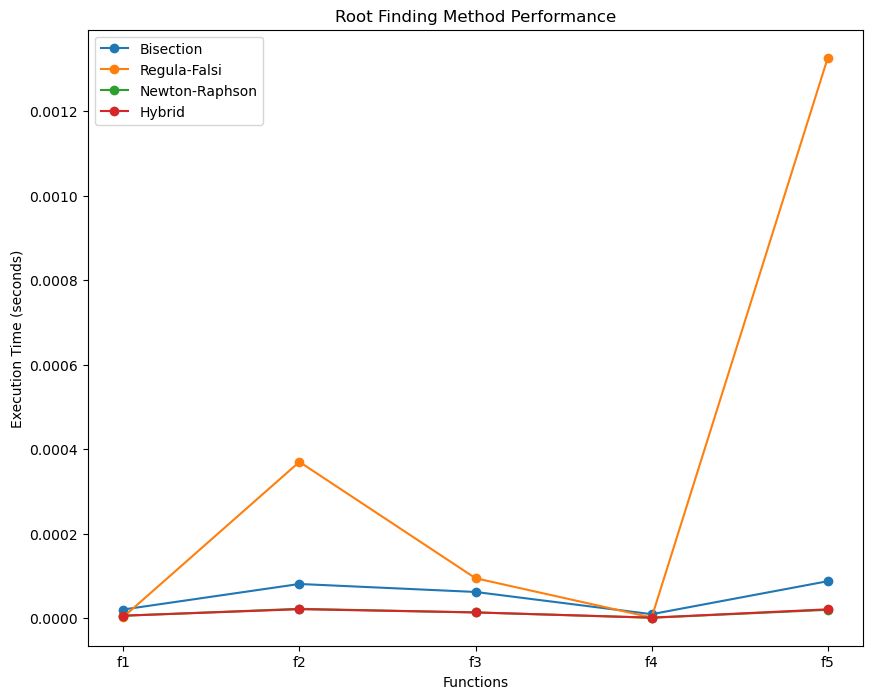

In [19]:
# Organising the data


functions = ['f1', 'f2', 'f3', 'f4', 'f5']


# Extracting times
bisection_times = [bisection_time_f1.best, bisection_time_f2.best, bisection_time_f3.best, bisection_time_f4.best, bisection_time_f5.best]
regula_times = [regula_time_f1.best, regula_time_f2.best, regula_time_f3.best, regula_time_f4.best, regula_time_f5.best]
newton_times = [newton_time_f1.best, newton_time_f2.best, newton_time_f3.best, newton_time_f4.best, newton_time_f5.best]
hybrid_times = [hybrid_time_f1.best, hybrid_time_f2.best, hybrid_time_f3.best, hybrid_time_f4.best, hybrid_time_f5.best]

# Finding average

bisection_times_avg = np.mean(bisection_times)
regula_times_avg = np.mean(regula_times)
newton_times_avg = np.mean(newton_times)
hybrid_times_avg = np.mean(hybrid_times)

# Plotting

plt.figure(figsize=(10, 8))

plt.plot(functions, bisection_times, label='Bisection', marker='o')
plt.plot(functions, regula_times, label='Regula-Falsi', marker='o')
plt.plot(functions, newton_times, label='Newton-Raphson', marker='o')
plt.plot(functions, hybrid_times, label='Hybrid', marker='o')
plt.title('Root Finding Method Performance')
plt.xlabel('Functions')
plt.ylabel('Execution Time (seconds)')
plt.legend()

The hybrid function is on par with the Newton-Raphson method (it is about the exact same). The Newton-Raphson method is not visible as it is identical to the hybrid functions graph, showing that the hybrid function does not sacrifice efficiency.

Now, I present the results of the final test, using the hybrid function to solve a real problem. In this case I will be using the hybrid function to solve Kepler's equation.

Problem: Given K, the mean anomaly and e, the eccentricity of orbit, find E, the eccentric anomaly.

Defining the equation:

In [20]:
# K is equal to 2*pi*t/P

def kepler_equation(E, e, K):
    return E - e * np.sin(E) - K

# Derivative

def kepler_derivative(E, e):
    return 1 - e*np.cos(E)

Solving the equation:

In [21]:
K = np.radians(45)
e = 0.4
bounds = (0, 2*np.pi)

# using E as an argument with lambda within the hybrid function

E_solution, E_iterations = Hybrid_Function(
    f=lambda E: kepler_equation(E, e, K), bounds=bounds, fp=lambda E: kepler_derivative(E, e)) # Using the lambda function with E as an argument

print(f"The solution for Eccentric Anomaly (E) using the hybrid algorithm is {E_solution} radians, which took {E_iterations} iterations")

The solution for Eccentric Anomaly (E) using the hybrid algorithm is 1.1506020443505252 radians, which took 8 iterations


We can verify the result by plugging E back into the equation, which should give 0:

In [22]:
E = 1.1506020443505252
K = np.radians(45)
e = 0.4

A = E - e * np.sin(E) - K
print(A)

0.0


# Discussion

The hybrid root-finding algorithm that was developed in this report demonstrates many notable strengths, it has shown to be very useful and an improvement over the individual algorithms. It has many features which make it less time consuming, such as the fact that it can calculate the derivative for you. Most notably, the combination of the Regula-Falsi and Newton-raphson methods, which allows for the Newton-Raphson method to be used without having to provide an initial guess, or even a derivative. It has demonstrated really impressive results able to converge quickly even for difficult functions.


There are, however several areas in which it is lacking. Most notably,  the fact that it does not support equations with several variables, as seen when solving Kepler's equation, where the lambda function was needed. Furthermore, the need to provide parameters is also a drawback, although the current algorithm can still run without an initial guess or derivative, I believe if the hybrid algorithm could calculate bounds on its own, it would be even better, and far more efficient for the user. I also believe a more accurate method for finding the derivative is possible.

# Conclusion

My aim in this report was to create a hybrid algorithm that could leverage the strengths of three well-known root-finding algorithms and create a hybrid function that could solve most, if not any, equation. From my testing and results, I believe I have succeeded in creating a useful algorithm. It took some trial and error, but I was able to ensure that this hybrid function was not simply a combination of the three methods but a unique algorithm that improves upon the individual methods themselves.

The results relative to the individual methods were impressive. Although not a massive improvement, it was pleasing to see that the hybrid algorithm worked just as well or better in many cases. In terms of time taken, I believe the hybrid algorithm performs exceptionally—on par with the Newton-Raphson method—and is well worth the extra time it may take to provide the parameters based on the results, where the hybrid function out-performed the individual algorithms in several cases. The hybrid function was also able to solve Kepler's equation, which was done with very few issues, such as needing to use lambda so that I could pass E as an argument, which would otherwise cause an error since E was a parameter that needed to be defined.

Overall, the hybrid algorithm ahs demonstrated the ability to solve a variety of functions efficiently, and minimises the risks that come with using the individual algorithms separately.

I believe I have achieved my aims to a fairly high degree, but I also think the hybrid algorithm has significant potential and a need for further improvement. Supporting several variables to handle more complex functions easily is a much-needed enhancement, which I realized when solving Kepler's equation. This would be an excellent area for future projects to build upon, as well as automating parameter selection. This would allow hybrid algorithms to be incomparably better than any individual methods.

# References

**\[1\]** MDPI \(2019\). A Comparative Study Among New Hybrid Root Finding Algorithms. Mathematics, \[online\] 7\(11\), p.1118. Available at: [https://www.mdpi.com/2227\-7390/7/11/1118](https://www.mdpi.com/2227-7390/7/11/1118) \[Accessed 15 Dec. 2024\].

**\[2\]** Bragitoff \(2023\). Numerical Methods for Root Finding with Python Code. [Bragitoff.com](http://Bragitoff.com). Available at: [https://www.bragitoff.com/2023/01/numerical\-methods\-for\-root\-finding\-with\-python\-code/](https://www.bragitoff.com/2023/01/numerical-methods-for-root-finding-with-python-code/) \[Accessed 15 Dec. 2024\].

**\[3\]** MDPI \(2023\). Hybrid Algorithms for Solving Nonlinear Equations. Axioms, \[online\] 12\(7\), p.684. Available at: [https://www.mdpi.com/2075\-1680/12/7/684](https://www.mdpi.com/2075-1680/12/7/684) \[Accessed 15 Dec. 2024\].  

